# Introduction to Scikit-Learn (sklearn)
This notebook demonstarates some of the most useful functions of hte beautiful Scikit-Learn library.

What we're goint to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. choosethe right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. save and load a trained model
7. Putting all together

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart = pd.read_csv("data/heart-disease.csv")
heart.head()
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (hyper matrix)
x = heart.drop('target', axis=1)
# create y (label)
y = heart['target']

In [4]:
# 2. Choose the right model and hypermarameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll get the default hperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the tranining data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [6]:
# make a pridition
#y_label = clf.predict(np.array([0,2,3,4]))

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1


In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2


In [9]:
y_preds = clf.predict(x_test)

In [10]:
y_preds

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
y_test

43     1
181    0
130    1
110    1
77     1
      ..
59     1
118    1
132    1
209    0
282    0
Name: target, Length: 61, dtype: int64

In [12]:
#4 Evaluate the model
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 5, 29]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [17]:
# 5 Improve a model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set is: {clf.score(x_test, y_test) *100:.2f} %")

trying model with 10 estimators
Model accuracy on test set is: 81.97 %
trying model with 20 estimators
Model accuracy on test set is: 88.52 %
trying model with 30 estimators
Model accuracy on test set is: 85.25 %
trying model with 40 estimators
Model accuracy on test set is: 88.52 %
trying model with 50 estimators
Model accuracy on test set is: 81.97 %
trying model with 60 estimators
Model accuracy on test set is: 83.61 %
trying model with 70 estimators
Model accuracy on test set is: 83.61 %
trying model with 80 estimators
Model accuracy on test set is: 81.97 %
trying model with 90 estimators
Model accuracy on test set is: 85.25 %


In [18]:
# 6 Save a model and load it
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8524590163934426

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually `x` & `Y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values (also called feature encoding)

In [20]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart.drop('target', axis=1)

In [22]:
y = heart['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into test and training

from sklearn.model_selection import train_test_split
np.random.seed(24)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

 ### 1.1 Make sure it is numerical

In [24]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [26]:
# split in to x,y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split int to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [27]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model.fit(x_train, y_train)

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
category_feature = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot", one_hot, category_feature)],remainder="passthrough")

transformer_x = transformer.fit_transform(x)
transformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
np.random.seed(24)
x_train, x_test, y_train,y_test = train_test_split(transformer_x, y, test_size=0.3)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.35004213925719885

## 1.2 What if there is a missing values

In [30]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
car_sales_missing['Make'].fillna("Missing", inplace=True)
car_sales_missing['Colour'].fillna("Missing", inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

C:\Users\Rediet\AppData\Local\Temp\ipykernel_70772\1001492625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna("Missing", inplace=True)
C:\Users\Rediet\AppData\Local\Temp\ipykernel_70772\1001492625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [33]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
car_sales_missing.dropna(inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

## Option 2: Fill missing values with Scikit-Learn

In [36]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing.dropna(subset=['Price'], inplace= True)
car_sales_missing.shape

(950, 5)

In [39]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# Split into X&Y 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
car_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
car_features = ['Make', 'Colour']
door_feature= ['Doors']
num_feature = ['Odometer (KM)']

#create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('car_imputer', car_imputer, car_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imiputer', num_imputer, num_feature)
])
# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make', 'Colour','Odometer (KM)', 'Doors'])

In [43]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [44]:
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
car_categories = ["Make", "Colour", "Doors"]
transform = ColumnTransformer([('one_hot', one_hot, car_categories)], remainder="passthrough")

transformed_x = transform.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 913)>

In [46]:
# Now we've got our data as numers and filled (no missing values)
# Let's fit a model
np.random.seed(2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.13206636554637563

In [47]:
len(car_sales_filled), len(y)

(950, 950)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm
* Classification - predictiong whether a sample is one thing or another
* Regression - predicting a number

 ### 2.1 Picking a machine learning model for a regression problem

In [48]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# boston

In [49]:
import pandas as pd

# URL of the Boston housing dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Column names for the dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset into a pandas DataFrame
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)
boston.head()

C:\Users\Rediet\AppData\Local\Temp\ipykernel_70772\1149745513.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
from sklearn.linear_model import Ridge
# create seed
np.random.seed(24)
#create data
x = boston.drop('MEDV', axis=1)
y=boston['MEDV']
# split train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6396793344552989

In [51]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
np.random.seed(7)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Create x and y
x= heart.drop('target' ,axis=1)
y = heart["target"]
#split it into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
clf = RandomForestClassifier().fit(x_train, y_train)

y_preds = clf.predict(x_test)

y_preds[:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [53]:
clf.score(x_test, y_test)

0.7213114754098361

In [54]:
y_test[:10]

125    1
57     1
282    0
66     1
114    1
281    0
132    1
255    0
37     1
273    0
Name: target, dtype: int64

In [55]:
np.mean(y_preds == y_test)

0.7213114754098361

In [56]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [57]:
np.random.seed(23)
from sklearn.ensemble import RandomForestRegressor

# x & y
x = boston.drop("MEDV", axis=1)
y = boston["MEDV"]
# split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# intialize regresor algortihm laso fit
model = RandomForestRegressor().fit(x_train, y_train)

# model.score(x_test, y_test)
y_preds = model.predict(x_test)
y_preds

array([22.351, 24.344, 21.979, 15.597, 47.012, 13.101, 18.39 , 30.673,
       32.311, 47.146, 14.676, 27.803, 20.58 , 21.671, 21.919, 17.583,
       30.617, 30.667, 22.937, 28.33 , 20.821, 15.453, 24.682, 24.049,
       12.466, 22.754, 32.859, 24.77 , 29.076, 42.066, 11.57 , 14.777,
       13.89 , 18.039, 30.823, 46.648, 21.649, 29.653, 14.428, 34.642,
       13.827, 11.591, 13.196, 19.83 , 40.   , 20.795, 16.804, 19.993,
        9.938, 46.068, 19.837,  8.615, 17.473, 16.138, 20.529, 26.022,
        8.082, 21.528, 19.059, 19.437, 18.043, 23.26 , 26.023, 47.457,
       26.767, 23.034, 15.012, 12.422, 29.433, 11.831, 19.086, 13.301,
       22.358, 16.022, 16.249, 14.45 , 15.068, 20.928, 11.462, 28.305,
       19.088, 21.392, 30.513, 13.082, 25.714, 19.96 , 33.567, 43.953,
       25.001, 15.097, 18.632, 18.847, 15.445, 19.737, 22.473, 14.345,
       48.975, 21.349, 22.261, 23.72 , 11.988, 19.594])

In [58]:
np.array(y_test)

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8])

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

2.4106862745098048

# 4 Evaluate
there is 3 ways to evaluate in sklearn:
1. Estimator `score` method
2. `scoring` parameter
3. Metric Function

### 4.1 Estimator `score` method

In [60]:
model.score(x_test, y_test)

0.8372164859435812

### 4.2 Scoring Parameter `scoring` 

In [61]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x= heart.drop('target', axis=1)
y = heart['target']

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size= 0.2)

clf = RandomForestClassifier().fit(x_train, y_train)

In [63]:
from sklearn.model_selection import cross_val_score
score_single = clf.score(x_test, y_test)
meancross = np.mean(cross_val_score(clf, x, y, cv=5))
score_single, meancross

(0.7868852459016393, 0.8150273224043716)

### 4.2.1 Classiication model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. confusion matrix
4. Classification report

**Accuracy**

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(23)
x = heart.drop('target', axis=1)
y = heart['target']

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, x, y, cv =5)


In [65]:
print(f"Heart Diseas Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f} %")

Heart Diseas Classifier Cross-Validated Accuracy: 82.84 %


**Area under the receiver operating characterstics curve (AUC/ ROC)**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of model's true postive rate(tpr) reruss a models false postive rate(fpr)

* True postive = model predicts 1 when the truth is 1
* False postive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when the truth is 0
* False negatice = model predicts 0 when the truth is 1

In [66]:
from sklearn.metrics import roc_curve

# Create x_test ....
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#fit the classifier
clf.fit(x_train, y_train)

# Make predictionwith probabilties
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.04, 0.96],
       [0.03, 0.97],
       [0.76, 0.24],
       [0.35, 0.65],
       [0.37, 0.63],
       [0.56, 0.44],
       [0.01, 0.99],
       [0.2 , 0.8 ],
       [0.27, 0.73],
       [0.92, 0.08]])

In [67]:
y_probs_postive = y_probs[:, 1]
y_probs_postive[:10]

array([0.96, 0.97, 0.24, 0.65, 0.63, 0.44, 0.99, 0.8 , 0.73, 0.08])

In [68]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_postive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03225806,
       0.03225806, 0.06451613, 0.06451613, 0.06451613, 0.09677419,
       0.09677419, 0.12903226, 0.12903226, 0.16129032, 0.22580645,
       0.25806452, 0.29032258, 0.35483871, 0.35483871, 0.41935484,
       0.4516129 , 0.51612903, 0.51612903, 0.61290323, 0.67741935,
       0.70967742, 0.74193548, 0.80645161, 0.87096774, 0.93548387,
       1.        ])

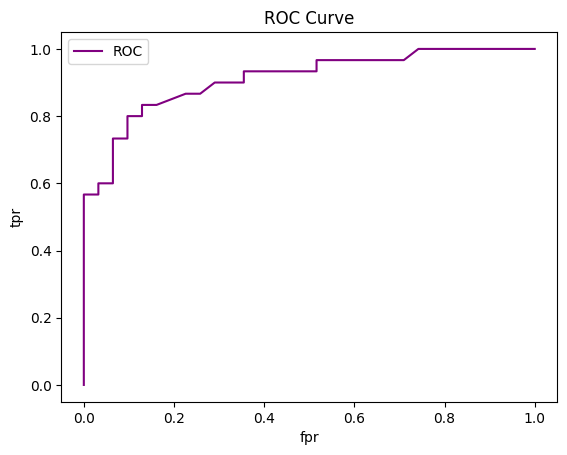

In [69]:
import matplotlib.pyplot as plt

# create a function for plotting for roc curves
def plot_roc(fpr, tpr):
    """
        plots the roc_cuver
    """
    plt.plot(fpr, tpr, color='purple', label='ROC')
    #plt.plot([0,1], linestyle='--', color='blue', label='Guessing')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
plot_roc(fpr, tpr)
    

In [70]:
from sklearn.metrics import roc_auc_score

print(f"The Acccuracy is {roc_auc_score(y_test, y_probs_postive) *100:.2f}%")


The Acccuracy is 91.08%


**Confusiion Matrix**

A confusion matrix is a quick way to compare the laels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [71]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_preds, y_test)


array([[27,  5],
       [ 4, 25]], dtype=int64)

In [72]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\gestimator-2.5-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


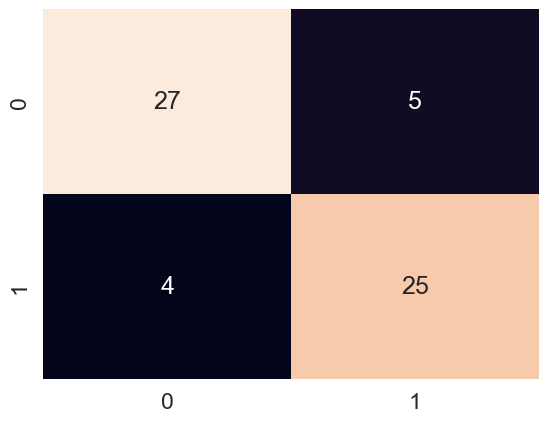

In [73]:
import seaborn as sea

sea.set(font_scale=1.5)

conf_mat = confusion_matrix(y_preds, y_test)

sea.heatmap(conf_mat, annot=True, cbar=False);

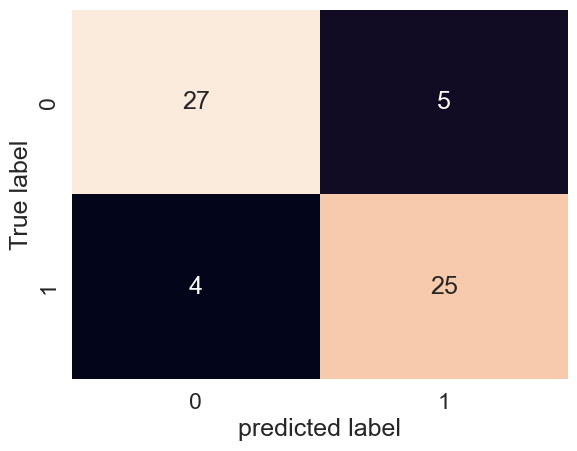

In [74]:
def heatmap_conf_mat(conf_mat):
    sea.heatmap(conf_mat, annot = True, cbar=False)
    plt.xlabel('predicted label')
    plt.ylabel('True label')
    plt.show()
heatmap_conf_mat(conf_mat);
    

**Classification Report**

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
1. R^2 (pronounced r-squred) or coefficent of etermination
2. Mean absolute error(MAE)
3. Mean squared error(MSE)

**R^2**

What R-squred does: Compares your models predictions to the mean of the targets, VAlues can range from negative infinity (a very poor modle) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 

In [76]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(12)

x = boston.drop('MEDV', axis=1)
y=boston['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [78]:
model.score(x_test, y_test)

0.8640446280987846

In [79]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [80]:
r2_score(y_test, y_test)

1.0

**Mean absoulute error(MAE)**

In [81]:
from sklearn.metrics import mean_absolute_error

# Prediction
ypreds = model.predict(x_test)

# Mean Absolute Error
mean_absolute_error(ypreds, y_test)

2.3435490196078432

In [82]:
df = pd.DataFrame(data = {
    'actual_values': y_test,
    'Predicted_values': ypreds
})

df['difference'] = df['actual_values'] - df['Predicted_values']
df

,actual_values,Predicted_values,difference
334,20.7,23.147,-2.447
394,12.7,12.873,-0.173
404,8.5,7.492,1.008
236,25.1,26.769,-1.669
307,28.2,29.480,-1.280
...,...,...,...
458,14.9,16.761,-1.861
263,31.0,29.479,1.521
433,14.3,15.552,-1.252
275,32.0,32.048,-0.048


**Mean Squared Error**

In [83]:
# Mean squred Error
from sklearn.metrics import mean_squared_error

y_preds= model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

11.108953686274512

In [84]:
# Calculate MSE by hand
squared = np.square(df['difference'])
squared.mean()

11.108953686274512

## 4.2.3 Finall using the `scoring` parameter

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(23)

x = heart.drop('target', axis=1)
y = heart['target']

clf = RandomForestClassifier()

cross_score = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

In [86]:
np.mean(cross_score)

0.8284153005464481

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(23)
x = heart.drop('target', axis=1)
y = heart['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf =RandomForestClassifier()
clf.fit(x_train, y_train)


RandomForestClassifier()

In [88]:
# Make prediciton
y_preds = clf.predict(x_test)

In [89]:
# Evaluate the classifier
print('Classifier metrics on the set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f} %')
print(f'Precision: {precision_score(y_test, y_preds)} %')
print(f'Recall: {recall_score(y_test, y_preds)} %')
print(f'F2: {f1_score(y_test, y_preds)}')



Classifier metrics on the set
Accuracy: 80.33 %
Precision: 0.7878787878787878 %
Recall: 0.8387096774193549 %
F2: 0.8125


In [90]:
# Regressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = boston.drop('MEDV', axis =1)
y = boston['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE : {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.9327421072431783
MAE : 2.072411764705884
MSE: 7.137470156862751


## 5. Improving a model

First Predicitons = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generall, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters Vs HyperParameters

Parameters = model find these patterns in data

Hyperparameters = settings on a model you can adjust to (potentially) improve it's ablity to find patterns

Three way to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [92]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparametrs by hand

Let's make 3 sets, training, validation and teset.

In [93]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're gooing to try and adjust:

* `max-depth`
* `max_features`
* `min_samples_leaf`
* `mins_samples_split`
* `n_estimators`

In [94]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparision on y_true labels vs y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision,2),
        "Recall": round(recall,2),
        "F1 score": round(f1,2)
    }
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Prec: {precision }')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1 :.2f}')
    return metric_dict

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(23)
# Shuffle Data
heart_shuffled = heart.sample(frac=1)

x = heart_shuffled.drop('target', axis=1)
y= heart_shuffled['target']

train_split = round(len(heart_shuffled) * 0.7)
valid_split = round(len(heart_shuffled) * 0.15 + train_split)

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf =RandomForestClassifier()
clf.fit(x_train, y_train)

ypreds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid, ypreds)

Acc: 86.67%
Prec: 0.9090909090909091
Recall: 0.83
F1: 0.87


In [96]:
np.random.seed(23)
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(x_train, y_train)
ypreds2 = clf_2.predict(x_valid)
clf_2_metrics = evaluate_preds(y_valid, ypreds2)
clf_2_metrics

Acc: 88.89%
Prec: 0.88
Recall: 0.92
F1: 0.90


{'accuracy': 0.89, 'precision': 0.88, 'Recall': 0.92, 'F1 score': 0.9}

In [97]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,1200],
     "max_depth": [None, 5,10,20,30],
      "max_features": ["auto", "sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf": [1,2,4]
     }
np.random.seed(23)

#Split in to x & y
x  = heart_shuffled.drop('target', axis=1)
y = heart_shuffled['target']

# Split in to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Initiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter=10, cv=5, verbose= 2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimat

C:\Program Files\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Program Files\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Program Files\Python312\Lib\site

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [98]:
#Best Parameters
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [99]:
# Make Prediction with the best parameters
rs_preds = rs_clf.predict(x_valid)

rs_metrics = evaluate_preds(y_valid, rs_preds)

Acc: 93.33%
Prec: 0.92
Recall: 0.96
F1: 0.94


## 5.3 Hyper parameter tuning with GridSearchCV

In [100]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

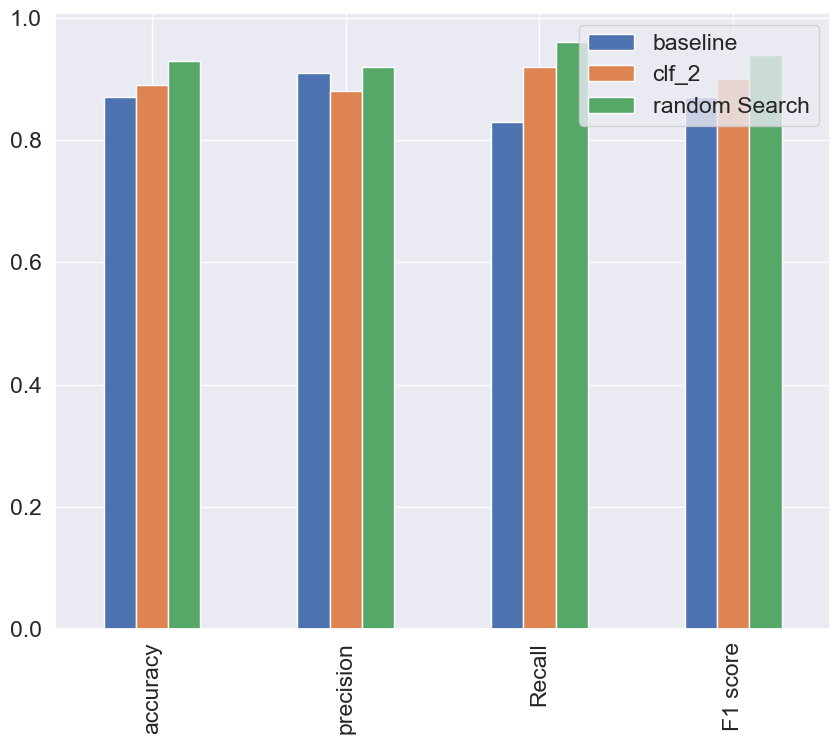

In [101]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "random Search": rs_metrics
})
compare_metrics.plot.bar(figsize = (10,8));

In [3]:
gedion = ["h", "3", 5, ["Civil", "SDA"]]

In [5]:
gedion

['h', '3', 5, ['Civil', 'SDA']]

In [6]:
gedion[3][1]

'SDA'

In [7]:
x = 5